#  *INTRODUCTION*
![IMDB](https://pchocasi.com.tr/wp-content/uploads/2017/12/IMDb-2017nin-En-Beğenilen-10-Yabancı-Filmini-Açıkladı-ÖNE-ÇIKAN-PNG-min.png)

Hello, everyone. This is my first NLP project kernel, so I'm open to suggestions and advices. In this kernel we'll do some basic sentiment analysis on IMDB movie reviews. 

What We will do:

  -  <h2>** 1. Take a Look at Data**</h2>
 
  -  <h2>** 2. Cleaning Data **</h2>
 
      -  <h2>** 2.1 Cleaning Texts **</h2>
    
  -  <h2>** 3. Analyze Data **</h2>
 
  -  <h2>** 4. Classify Data **</h2>

So, let's get started!


First thing first, we'll import libraries

In [2]:
# Importing the libraries
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

# 1. Take a Look at Data

Now, we can read our dataset and see some samples from it.

In [3]:
#reading the dataset
df_combined = pd.read_csv("D:\\data science\\imdb-review-datasetkggle\\imdb_master.csv", encoding = 'latin-1', index_col = 0)
df_combined.sample(10)

,type,review,label,file
32802,train,Another FINE effort by America's most UNDERrat...,neg,5773_1.txt
24959,test,"Michael Radford, the director of ""The Merchant...",pos,9965_8.txt
47928,train,This movie is a great mocumentary. It follows ...,pos,8136_9.txt
67360,train,When I first saw the ad campaign for this movi...,unsup,25625_0.txt
75401,train,"I had some expectations for this movie, but it...",unsup,32862_0.txt
44565,train,I grew up in Houston and was nine when this mo...,pos,5109_10.txt
260,test,"Wow, was this version of THE RACKETEER tough t...",neg,10234_3.txt
27447,train,"By rights, there should never have been a ""Fir...",neg,12202_3.txt
91845,train,"Sorry guys, not feelin' this one. Story: Freak...",unsup,47662_0.txt
61516,train,...because I wanted to watch this movie when i...,unsup,20365_0.txt


# 2. Cleaning the Data

Now, we need to some cleaning in our data.

1- Drop file column, because we don't need it.

2- Get the first 50000 rows of our dataset, because the rest of it is for unsupervising.(We'll just work on supervises)

3- Drop type column and shuffle our dataset, because the first 25000 rows are for train and second one is for test.

In [4]:
df_combined.drop('file', axis = 1, inplace = True)
df_combined = df_combined[:50000]
df_combined = df_combined.sample(frac=1).reset_index(drop=True)
df_combined.drop('type', axis = 1, inplace = True)

# 2.1 Cleaning the Texts
in this part, we'll clean the reviews by:

- Remove HTML Tags
- Remove Punctuations
- Lower All Letters( for example one and One will be count two different words if we don't lower letters)
- Stem Words(get the roots of words)

In [5]:
# nltk.download('stopwords')
corpus = []
for i in range(0, 50000):
    soup = BeautifulSoup(df_combined['review'][i],"html5lib")
    df_combined['review'][i] = soup.get_text(strip=True)
    review = re.sub('[^a-zA-Z]', ' ', df_combined['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


# 3. Analyze Data

Now, after we cleaned our dataset we can take all the words and see what are the most 15 most common words in reviews.

In [6]:
#take all words 
tokens = []  
for i in corpus:
    for t in i.split():
        tokens.append(t)

freq = nltk.FreqDist(tokens)
# printing 15 most common words 
freq.most_common(15)

[('movi', 103228),
 ('film', 95846),
 ('one', 55430),
 ('like', 45196),
 ('time', 31947),
 ('good', 30178),
 ('make', 30019),
 ('charact', 28346),
 ('see', 28234),
 ('get', 27962),
 ('watch', 27872),
 ('even', 25346),
 ('stori', 25270),
 ('would', 24598),
 ('realli', 23090)]

As you can see, movie and film words are the top words.Now let's see these most common words in a graph.

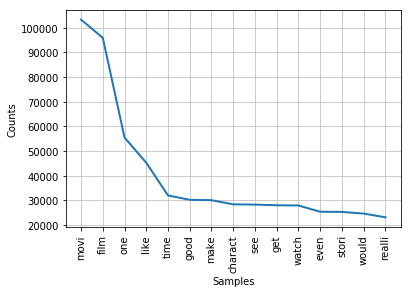

In [7]:
freq.plot(15, cumulative=False)

Now, we're going to take 3000 words from our reviews. Then, we're going to build a function that will find these top 3,000 words in our positive and negative reviews.

In [16]:
word_corpus = []
for i in corpus:
    word_corpus.append(word_tokenize(i))

labels = df_combined.iloc[:50000, 1].values
documents = [(list(x), y) for x,y in zip(word_corpus, labels)]

word_features = []
for i in freq.most_common(3000):
    word_features.append(i[0])

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# 4. Classify Data

Now it's classify time, before we do it, first let's get our training and test set.

In [17]:
# getting training set
training_set = featuresets[:25000]

# getting test set
testing_set = featuresets[25000:]

We'll use nltk library's NaiveBayesClassifier and show the most informative words in our reviews.

In [18]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Classifier accuracy percent:",
      (nltk.classify.accuracy(classifier, testing_set))*100)

Classifier accuracy percent: 85.436


In [19]:
classifier.show_most_informative_features(15)

Most Informative Features
                 matthau = True              pos : neg    =     18.9 : 1.0
                 stinker = True              neg : pos    =     18.8 : 1.0
                     mst = True              neg : pos    =     14.0 : 1.0
                 unfunni = True              neg : pos    =     12.9 : 1.0
                   worst = True              neg : pos    =     10.1 : 1.0
                laughabl = True              neg : pos    =      9.5 : 1.0
                 incoher = True              neg : pos    =      9.3 : 1.0
                  atroci = True              neg : pos    =      9.0 : 1.0
                    wast = True              neg : pos    =      8.7 : 1.0
                   lousi = True              neg : pos    =      8.7 : 1.0
                  seagal = True              neg : pos    =      8.5 : 1.0
                  poorli = True              neg : pos    =      8.5 : 1.0
                      aw = True              neg : pos    =      8.2 : 1.0

We can use other algorithms as well, let's use Random Forest Classification and Kernel SVM

In [20]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifierRF = SklearnClassifier(RandomForestClassifier(n_estimators = 10,
                                                        criterion = 'entropy', 
                                                        random_state = 0))
classifierRF.train(training_set)

print("Classifier accuracy percent:",
      (nltk.classify.accuracy(classifierRF, testing_set))*100)

Classifier accuracy percent: 77.756


In [21]:
classifierSVC = SklearnClassifier(SVC(kernel = 'rbf', random_state = 0))
classifierSVC.train(training_set)
print("Classifier accuracy percent:",
      (nltk.classify.accuracy(classifierSVC, testing_set))*100)

Classifier accuracy percent: 85.556


Kernel SVM and nltk's Naive Bayes' accuracies are high and close.

That's it, thank you so much for reading this kernel. I'm new at this area so, if you have any advice, don't hesitate please.